# Module 3: Anomaly Detection
## Cumulative Exercise:
### Outlier Reduction for Linear Regression on an Auto MPG Dataset

In this exercise, you'll be attempting linear (Ridge) regression on a dataset encoding automotive 
MPG against several other discrete and continuous variables, 
as described [here](https://archive.ics.uci.edu/ml/datasets/auto+mpg) in the UCI repository.

### Notes and cautionary advice
1. The clearest use of this dataset is to predict MPG, which is column one in the .txt.
2. The .txt file is *whitespace-delimited*, meaning the read_table method with parameter `delim_whitespace=True` in `pandas` is your best option for getting it into a `DataFrame`.
3. Automated cross validation scoring and train/test splitting is completely acceptable given the limited scope of this exercise.
5. For convenience, some `NaN` values have been pre-emptively cleaned from this dataset. Looking at the original dataset, there are a handful of entries containing null or `?` values, which we have removed.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge

# path to dataset
DATASET = '../resources/autoMPG.txt'
assert os.path.exists(DATASET)   # check if datafile is present

# Read your data into a DataFrame called 'dataset'
dataset = pd.read_table(DATASET, header=None, delim_whitespace=True).dropna().sample(frac=1).reset_index(drop = True)
dataset.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
    'year', 'origin', 'car_name']
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Pull columns from dataset into variables X (everything except mpg) and y (mpg).

In [5]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,26.0,4,108.0,93.0,2391.0,15.5,74,3,subaru
1,22.5,6,232.0,90.0,3085.0,17.6,76,1,amc hornet
2,25.1,4,140.0,88.0,2720.0,15.4,78,1,ford fairmont (man)
3,17.7,6,231.0,165.0,3445.0,13.4,78,1,buick regal sport coupe (turbo)
4,24.0,4,113.0,95.0,2278.0,15.5,72,3,toyota corona hardtop


In [11]:
# Complete code below this comment  (Question #E4001)
# ----------------------------------
X = np.array(dataset.iloc[:,1:-1])
y = np.array(dataset.mpg)

Create training/validation split with 30% held out. 

In [14]:
# Complete code below this comment  (Question #E4002)
# ----------------------------------
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)


Fit a Ridge regressor without anomaly detection

In [15]:
# Complete code below this comment  (Question #E4003)
# ----------------------------------
naive_model = Ridge().fit(X_train,y_train)

Create prediction from X_test and store into variable <span style="background: yellow;">naive_predictions</span>

Create a scatter plot of y_test against naive predictions.  
The following is for reference.

~~~python
plt.scatter(<placeholder>, <placeholder>)
plt.title("No outlier reduction")
plt.xlabel("Y-actual (raw splits)")
plt.ylabel("Y-predicted (from raw model)")
plt.show()
~~~

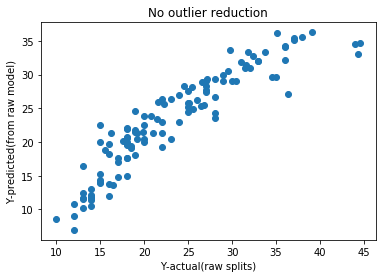

In [17]:
# Complete code below this comment  (Question #E4005)
# ----------------------------------
plt.scatter(y_test,naive_predictions)
plt.title("No outlier reduction")
plt.xlabel('Y-actual(raw splits)')
plt.ylabel("Y-predicted(from raw model)")
plt.show()

### Using a model of your choice, remove outliers from X and y.

Import your tools for outlier reduction.  
Options include: `KMeans`, `EllipticEnvelope`, `IsolationForest`, and `OneClassSVM`. 

In [18]:
# Complete code below this comment  (Question #E4006)
# ----------------------------------
from sklearn.ensemble import IsolationForest

# Construct IsolationForest 
iso_forest = IsolationForest(n_estimators=250,
                             bootstrap=True).fit(X, y)
# Get labels from classifier and be ready to pull outliers
iso_outliers = iso_forest.predict(X)==-1

# pull inliers
X_iso = X[~iso_outliers]
y_iso = y[~iso_outliers]

Create training/validation split again.

In [19]:
# Complete code below this comment  (Question #E4007)
# ---------------------------
X_train_iso, X_test_iso, y_train_iso, y_test_iso = train_test_split(X_iso, 
                                                                    y_iso, 
                                                                    test_size=0.3)

Fit a new model against inliers and print score for the model.

In [22]:
# Complete code below this comment  (Question #E4008)
# ----------------------------------
iso_model = Ridge()
iso_model.fit(X_train_iso, y_train_iso)
print(iso_model.score(X_test_iso,y_test_iso))
Y_predicted_iso=iso_model.predict(X_test_iso)


0.812438813634


Plot y-actual against y-predicted again for labels in testing set.

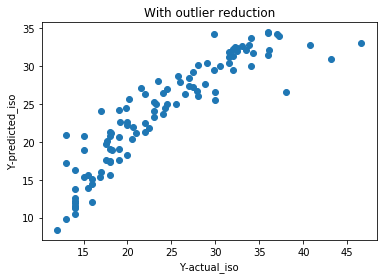

In [25]:
# Complete code below this comment  (Question #E4009)
# ----------------------------------
plt.scatter(y_test_iso,Y_predicted_iso)
plt.title("With outlier reduction")
plt.xlabel('Y-actual_iso')
plt.ylabel("Y-predicted_iso")
plt.show()

Pickle (serialize) your model as the file named: `my_module_4_model.pkl`

In [27]:
# Complete code below this comment  (Question #E4010)
# ----------------------------------
from sklearn.externals import joblib
filename = 'my_module_4_model.pkl'
joblib.dump(iso_model, filename)



['my_module_4_model.pkl']

# Save your notebook!